# Base sentiment labling -- prediciting labels with non missing/accurate data(sklearn)

## Logistic regression and tokenization using  TfidfVectorizer

In [3]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd

review_data = pd.read_csv("/Users/apple/Documents/GitHub/Steam-Market-Data-ML/cleaned_reviews.csv")


print(review_data["review_comment"].isna().sum())
review_data["review_comment"] = review_data["review_comment"].fillna("") 
review_data["recommend"] = review_data["recommend"].map({"Recommended": 1, "Not Recommended": 0})

vectorizer = TfidfVectorizer()

review_vectorized = vectorizer.fit_transform(review_data["review_comment"])
review_X = vectorizer.fit_transform(review_data["review_comment"])  # Convert text to TF-IDF features
review_y = review_data["recommend"]


# print(vectorizer.get_feature_names_out())  # Shows vocabulary
review_X_train, review_X_test, review_y_train, review_y_test = train_test_split(review_X, review_y, test_size=0.2, random_state=2025)
logit_review_model = LogisticRegression()


logit_review_model.fit(review_X_train, review_y_train)

review_y_pred = logit_review_model.predict(review_X_test)

# print(review_X_train.shape[0])

accuracy = accuracy_score(review_y_test, review_y_pred )
precision = precision_score(review_y_test, review_y_pred ,average='macro')
recall = recall_score(review_y_test, review_y_pred ,average='macro')


print("\nEvaluation Results on Test Data:")
print(f"Accuracy:  {accuracy}")
print(f"Precision: {precision}")
print(f"Recall:    {recall}")
print(f"Accuracy: {accuracy:.4f}")




1

Evaluation Results on Test Data:
Accuracy:  0.8649506135887459
Precision: 0.8581362375605909
Recall:    0.8286273977149197
Accuracy: 0.8650


Transforms text data into numerical features rather than embedding for the moment since for the base example it's less compuationally intensive and does the job for transfomation for the base models. Standarize and min max scaling are used for contious variable and that is why I didn't apply them here.

In [4]:
from sklearn.preprocessing import StandardScaler

## More detailed evlaution of the model


Summary Statistics evaluation:
{'0': {'precision': 0.8425531914893617, 'recall': 0.7231555880204529, 'f1-score': 0.7783018867924528, 'support': 5476.0}, '1': {'precision': 0.87371928363182, 'recall': 0.9340992074093865, 'f1-score': 0.902900921063958, 'support': 11229.0}, 'accuracy': 0.8649506135887459, 'macro avg': {'precision': 0.8581362375605909, 'recall': 0.8286273977149197, 'f1-score': 0.8406014039282055, 'support': 16705.0}, 'weighted avg': {'precision': 0.8635028501944, 'recall': 0.8649506135887459, 'f1-score': 0.8620566042922873, 'support': 16705.0}}


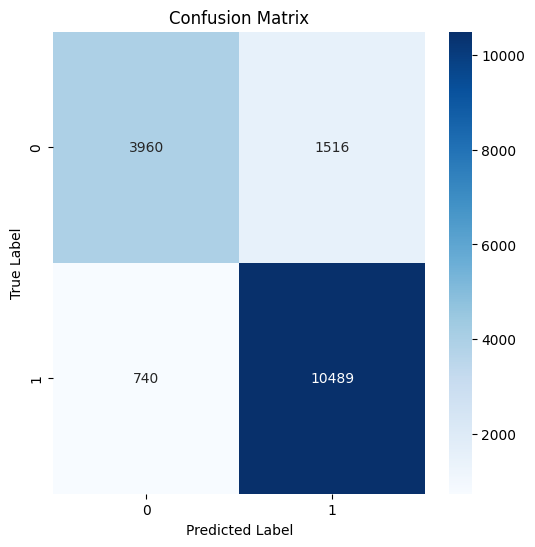

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


report = classification_report(review_y_test, review_y_pred, output_dict=True)

# Print summary statistics
print("\nSummary Statistics evaluation:")
print(report)



# Confusion matrix
conf_matrix = confusion_matrix(review_y_test, review_y_pred)
labels = np.unique(review_y_test)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()







## summary statistic for prediction dataset




In [6]:
# print(Dataframe(review_y_pred).describe())
df_preds = pd.DataFrame(review_y_pred, columns= ["Predicted Labels"])
print(df_preds.describe())

print("----------------")

df_test = pd.DataFrame(review_y_test) 
print(df_test.describe())



       Predicted Labels
count      16705.000000
mean           0.718647
std            0.449673
min            0.000000
25%            0.000000
50%            1.000000
75%            1.000000
max            1.000000
----------------
          recommend
count  16705.000000
mean       0.672194
std        0.469428
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000


This is the summary statistic but what we care more is about the evaluation in this case, since the interpretation of the output data itself not a focus of the research problem rather than the labeling this of relative lesser importance. But we can compare it to the original labled data summary statistic. which is largly similar. 

## Include other features(TBD)

## SVM(I suspect it would fail to run due to the high dimension, but I'm trying anyways,failed )

In [ ]:
# from sklearn.decomposition import PCA

# # Reduce dimensions using PCA
# pca = PCA(n_components=10000)  # You can experiment with this number
# review_X_pca = pca.fit_transform(review_X.toarray())  # Apply PCA on the sparse matrix

# print("PCA dones")
# # Now use SVM with reduced dimensions
# from sklearn.svm import SVC

# svm_model = SVC(kernel="linear")
# svm_model.fit(review_X_pca, review_y_train)

# review_y_pred_svm = svm_model.predict(review_X_pca)

# accuracy_svm = accuracy_score(review_y_test, review_y_pred_svm)
# precision_svm = precision_score(review_y_test, review_y_pred_svm, average='macro')
# recall_svm = recall_score(review_y_test, review_y_pred_svm, average='macro')

# print("\nSVM with PCA Evaluation Results:")
# print(f"Accuracy: {accuracy_svm:.4f}")
# print(f"Precision: {precision_svm:.4f}")
# print(f"Recall: {recall_svm:.4f}")

We face memory and runtime issue despite using pca